# Solving Equations and Curve Fitting.

This week we will be solving equations and fitting data to curves.  Both of these procedures rely on linear algebra techniques to efficiently solve problems numerically.

## Solving systems of linear equations

Sometimes physics problems can involve solving many, many equations simultaneously.  This can be done analytically by hand using linear algebra.  If you aren't familiar with Gaussian substitution and back elimination, read pages 1-4 of the included PDF.  There are more efficient ways to solve these problems, too; read the rest of the PDF for more information on one of them, LU decomposition.  

This week we will be using the `numpy.linalg` library to solve a problem quickly.

#### Exercise 1
Using the circuit below, first write down a set of 6 linear equations for the currents $i1$ through $i6$ in the Wheatstone bridge circuit.  Remember Ohm's Law, $V = IR$, and use Kirchoff's Laws to write your equations.  Kirchoff's Laws state that all currents entering a point in a circuit must add up to zero, and all voltages in a loop must also add up to zero.

<img src="Bridge Circuit 6.png" style="width: 200px">

As examples, 

$i6 - i1 - i2 = 0$ (sum of currents at point at top of circuit)

$i2 \times R2 - i3 \times R3 - i1 \times R1 = 0$ (sum of voltages around top loop of the bridge)

Once you have written down your six equations and made sure that they are independent, create a function that takes the values $R1$–$R6$ and $V$ as arguments and creates a 6x6 `numpy` array (**M**) from your equations and an 6x1 array with the constants (**r**), such that **M i = r**. 

To represent a system of equations to `numpy`, remember that it is the *coefficients* of the variables that distinguish one equation from another.  So our 6x6 matrix of equations is really a 6x6 matrix of coefficients, with each row representing one equation, and each position in a row implicitly associated with one of the independent variables.  In our case, our variables are $i1$–$i6$, so as an example, the second equation above would be passed to `numpy` as `[-R1, R2, -R3, 0, 0, 0]`.  Make sure you understand why that is before moving on with writing your own function. 


Have your function use the `numpy.linalg.solve()` function solve your equations for the i's.  Call your function with R1 = 6 ohm, R2 = 4 ohm, R3 = 18 ohm, R4 = 7 ohm, R5 = 3 ohm and V = 12 V.  Print the full solution, as well as specifically printing the current and voltage across R3.  (Any printing of output like this should also print some explanatory text along with it, so that it's not necessary to look at the details of the code in order to understand the output.) 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function, division

#Linear Equation Set and solving.
def circuit(R1,R2,R3,R4,R5,V):
    IV = np.array([[-1,-1,0,0,0,1],[1,0,-1,-1,0,0],[0,0,0,1,1,-1],[-1*R1,R2,-1*R3,0,0,0],[0,0,R3,-1*R4,R5,0],[R1,0,0,R4,0,0]])
    v = np.array([0,0,0,0,0,V])
    return np.linalg.solve(IV,v)

R1=6
R2=4
R3=18
R4=7
R5=3
V=12
sol = circuit(R1, R2, R3, R4, R5, V)
print("The full solution is I1-I6 =",sol)
print("The current across R3 is %0.2f amps, so the voltage across R3 is %0.2f volts." % (sol[2],sol[2]*R3))

The full solution is I1-I6 = [ 0.95402299  1.68965517  0.05747126  0.89655172  1.74712644  2.64367816]
The current across R3 is 0.06 amps, so the voltage across R3 is 1.03 volts.


### Fitting functions to data

Often in physics we will have some experimental data, and we would like to model the data with some particular mathematical function.  For example, we know that a ball thrown in the air should follow a parabolic path as a function of time: $y = y_0 + v_0 t + \frac{1}{2}g t^2$.  Thus, if we have a bunch of $(t_i, y_i)$ data points, we could fit the aforementioned function to the data, with $y_0$ and $v_0$ as free parameters, and thus use the data to determine how fast the ball was thrown and from what initial height. 

In other cases, we might have a dataset, but we might not know *a priori* what functional form is the best one to fit the data, so we might try a few different options.  Or we might have two competing theories that predict different functional forms for the data, and we might want to see which one in fact ends up giving a better fit to the data.

In many computer languages (python included), doing this sort of fitting proceeds in two steps:

* Write a function that takes the independent variable as input (e.g. as a `numpy` array), along with any values for the function parameters, and returns an array of corresponding values of the fitting function at each of the input data points. 

* Pass that function, along with initial guesses for the parameters to be fit, to a routine that finds the "best fit" values of the fitting parameters. 

For now we will leave what we mean by "best fit" vague, and work through a simple example of this sort of fitting, using the `scipy` fucntion `scipy.optimize.curve_fit()`. 

#### Exercise 2

Write a function that takes an array of time values as input, along with the parameters $y_0$ and $v_0$, and returns an array of the $y$ position values, following the equation above.  So that it will be usable with `scipy.optimize.curve_fit()`, make sure that the time values (independent variable) is the first parameter in your function declaration.

Now generate a set of time values (using, e.g., `np.linspace`), and pass those to your function, returning the corresponding $y$ values.  Graph the result.  Make the time values closely spaced enough so that the curve looks relatively smooth. 

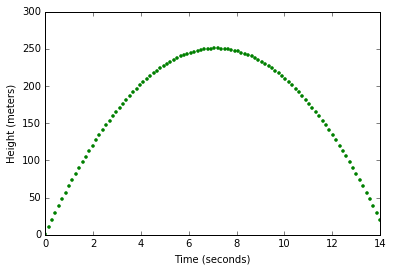

In [5]:
def parabola(t, y0, v0):
    """Return y values from parabolic motion under
    gravity, with initial height y0 and initial speed v0, for input times t.
    Assumes no air resistance."""
    g = -9.8
    y = y0 + v0*t + 0.5*g*t**2
    return y

# Generate some times:
t = np.linspace(0,14,100)
# Initial values:
v0=70
y0=0.5
y = parabola(t, y0, v0)
plt.plot(t, y, 'g.')
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.show()

#### Exercise 3

Using the same array of time values and same function from above, generate a "noisy" dataset.  That is, generate values from your function (or just use the ones created in the last step), and then add random noise to the values and store the results in a new array.  Plot these noisy values (as points, not connected by a line).  If necessary, adjust the noise level so that the overall shape of the curve is apparent, but that there is clearly some scatter in the data. 

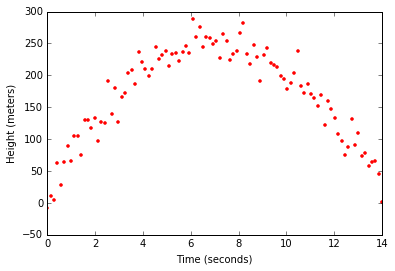

In [6]:
# Now added some noise to the data
y_noisy = y + np.random.normal(size=len(y), scale=20)
plt.plot(t, y_noisy, 'r.')
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.show()

#### Exercise 4

Now use `scipy.optimize.curve_fit()` to find the best fit to your "noisy" datapoints generated in the previous exercise.  Looking at the documentation for that will show you an example of its usage, but briefly, you pass it the name of your function, the x array (independent variable), and the y array (dependent variable, i.e. function values), and it returns an array of the parameters that provide the best fit, along with an estimate of the *covariance matrix*.  The latter is an estimate of the uncertainty in the fitted parameters.  The diagonal elements can be thought of as uncertainties on the individual parameters in isolation, and the off-diagonal elements provide an indication of how linked each pair of parameters is, i.e. how changing the value of one would influence the value of the other. 

Repeat your plot from the previous exercise, showing the noisy data as points.  Then overplot a line showing the best-fit curve based on the parameters returned by `curve_fit`.  Note that you can calculate this best-fit line easily using your original function, just by passing it the same independent-variable array, and the parameters returned from `curve_fit`, which will be in the same order as needed for your function.  Also print out the values of the best-fit parameters, and comment on whether they are close to the values you used to generate the noisy data in the first place.  (They should be!) 

Best-fit parameters are [  8.04770798  69.17681678]
Original input parameters are 0.5 70
Covariance matrix:
[[ 14.60246587  -1.55668779]
 [ -1.55668779   0.22238397]]


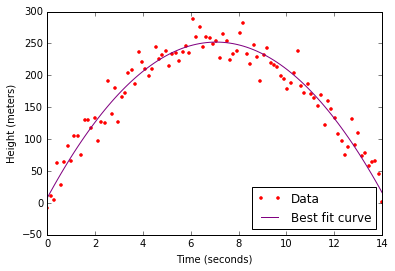

In [7]:
from scipy.optimize import curve_fit

fit_pars, covar = curve_fit(parabola, t, y_noisy)
print("Best-fit parameters are", fit_pars)
print("Original input parameters are", y0, v0)
print("Covariance matrix:")
print(covar)

# Generate y values for fit:
y_fit = parabola(t, fit_pars[0], fit_pars[1])
plt.plot(t, y_noisy, 'r.', label='Data')
plt.plot(t, y_fit, color='purple', label='Best fit curve')
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.legend(loc='best')
plt.show()

### Fitting lines from a spectrum, and comparing fits

Now let's try a somewhat more useful example - fitting the lines in a spectrum.  We'll load in data for a real spectrum of the mineral magnesite, and fit some of the lines.  We'll compare fits to see which of two possible functional forms is a better fit to the line profile. 

First let's just get the data and see what we're working with.  The `numpy` routine `genfromtxt` makes it easy to read data from a text file, which is something you'll often want to do when working with experimental data.  When you read in data in this way, the routine returns an n_columns x n_rows 2D `numpy` array.  It's often simplest to go ahead and assign columns from this to separate variable names right away, e.g. if you read in a two-column datafile into array $A$, you may then want to do `x = A[:, 0]` and `y = A[:, 1]`.  (Note that in `numpy` arrays, the *second* dimension refers to columns.  So that line `x = A[:, 0]` means "take every row from A, but only column 0".)

#### Exercise 5

Import the Raman spectrum for the mineral magnesite from the file Magnesite.txt using `np.genfromtxt` and then plot the entire spectrum.  The x axis is in units of cm$^{-1}$.  (Inverse centimeters are called "wavenumbers", and are a unit of frequency of light - they are more common in chemistry than physics, but you'll sometimes see them crop up.)

Once you've plotted the whole spectrum, select a subset of data around one of the strong spectral lines, and plot only that line - that's a line we'll use for fitting in the next step.  Save the x and y values for this line in separate arrays for use next.

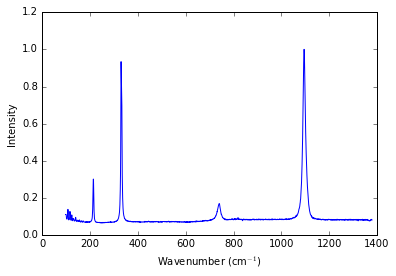

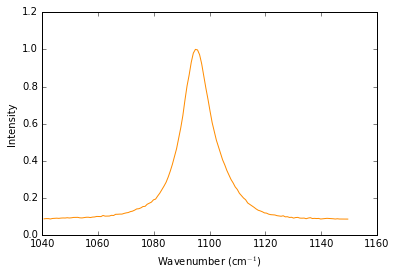

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
#loading data using numpy's routine.
data = np.genfromtxt('Magnesite.txt')

#plotting the data, the peaks under 400 are difficult to fit with Gaussians - too narrow.
wavenum = data[:,0]
intens = data[:, 1]
plt.plot(wavenum, intens)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity')
plt.show()

# Pick a strong line to plot:

line = np.logical_and(wavenum > 1040, wavenum < 1150)
x_line = wavenum[line]
y_line = intens[line]

plt.plot(x_line, y_line, color='darkorange')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity')
plt.show()

####  Exercise 6

Now let's try fitting one of the lines in this spectrum.  

First we'll try fitting the line with a Gaussian function.  Create a function that takes as arguments the central frequency, peak amplitude, and width of the Gaussian, as well as a constant additive offset (since we can see above that the background level doesn't go all the way down to zero).  It also needs to take as its first argument the independent variable, the frequency.  Use `scipy.optimize.curve_fit()` to fit the Gaussian.  You may need to make an initial guess using the `p0=` argument.

Though it's optional, before running the fitting, but after writing your Gaussian function, it's a good idea to just calculate and plot the function, to make sure that it is behaving as you expect.  Once it looks good with you manually specifying the parameters, you can go ahead and run the fit to find the best-fitting parameters.  This manual running of your function is also a good way to determine some good initial guesses for the parameters, which can be helpful to allow the fit to converge quickly to the optimal solution. 

Print the fit parameters and plot the data and its fit, following the earlier example. 

[  1.09560374e+03   8.09632710e-01   6.37921112e+00   1.10643178e-01]


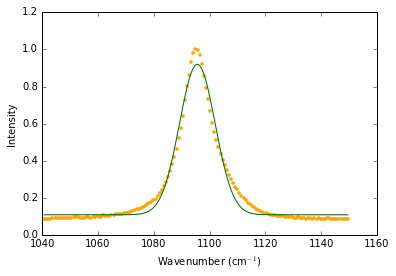

In [9]:
# Our fitting function.
def gaussian(freq, center_freq, amp, width, const):
    return amp*np.exp(-(freq-center_freq)**2/(2*width**2)) + const

# Do the fit and plot the results.
fit_pars, covar = curve_fit(gaussian, x_line, y_line,
                           p0=[1100, 1, 1, 1])
print(fit_pars)
                      
plt.plot(x_line, y_line, color='orange', linestyle='none', marker='.')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity')

y_fit_g = gaussian(x_line, fit_pars[0], fit_pars[1], fit_pars[2],
                fit_pars[3])
plt.plot(x_line, y_fit_g, color='darkgreen')
plt.show()


#### Exercise 7

Now do the same exercise as above but define a function to calculate a Lorentzian 
line profile, which has the functional form

$L = \frac{1}{2\pi} \frac{w}{(\nu - \nu_0)^2 + (w/2)^2}$

where $w$ is the width of the line and $\nu_0$ is its central frequency.   As before, allow a multiplicative
scaling amplitude and a constant additive offset.

[  1.09549721e+03   1.89139647e+01   1.29701358e+01   6.91399732e-02]


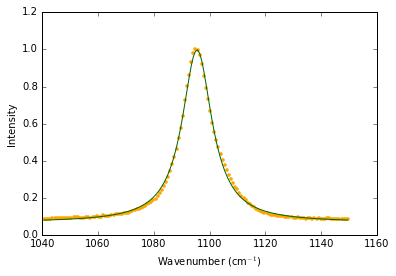

In [30]:

# Alternate fitting function - Lorentzian instead of Gaussian:
def lorentzian(xvals, xcenter, amp, width, const ):
    '''Given a numpy array of xvalues in xvals, return
    a numpy array of y values of the Lorentzian function 
    with center xcenter and width parameter gamma.'''

    return amp * (width/(2.*np.pi)) * 1/((xvals-xcenter)**2 + (0.5*width)**2) + const


# Do the fit and plot the results.
fit_pars, covar = curve_fit(lorentzian, x_line, y_line,
                           p0=[1100, 1, 1, 1])
print(fit_pars)
                      
plt.plot(x_line, y_line, color='orange', linestyle='none', marker='.')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity')

y_fit_l = lorentzian(x_line, fit_pars[0], fit_pars[1], fit_pars[2],
                fit_pars[3])
plt.plot(x_line, y_fit_l, color='darkgreen')
plt.show()





### Goodness of fit

Now, which of these functions is more appropriate for our dataset?  A Lorentzian profile is expected theoretically if the main line broadening mechanism is the energy uncertainty from the Heisenberg uncertainty principle.   A Gaussian profile is expected if the main thing broadending the line is Doppler shift due to the random motions of individual atoms.  So determining the best-fit profile can tell us something about the physical situation in the gas. 

Your eye can probably tell you already which is the better fit, but it's worth learning how to determine this formally, i.e. how you would distinguish between fits if it weren't obvious to the eye. 

To do this, we need some quantitative measure of goodness of fit. The most common way to do this is by calculating a statistic called $\chi^2$ (pronounced "chi squared").  This is given by summing up the squared deviations between the data and fit:

$\chi^2 = \Sigma (y_{data,i} - y_{fit,i})^2$

where the sum is over all the data points.  A smaller $\chi^2$ indicates a better fit.

More generally, in the common case where each $y_i$ data point has an uncertainty $\sigma_i$, we use these as well to weight the sum:

$\chi^2 = \Sigma \frac{(y_{data,i} - y_{fit,i})^2}{\sigma_i^2}$

so that the sum is affected less by points with large uncertainties if they don't happen to lie close to the fit. 

#### Exercise 8

Write a function to calculate and call it to print the $\chi^2$ value for each of your two fits above.  Which is a better fit, a Lorentzian or a Gaussian?


In [31]:
def chi_squared(y_data, y_fit, y_unc=None):
    '''Given two input arrays of equal length, calculate and
    return the chi_squared value.  Use uncertainties if they
    are given.'''
    
    if y_unc is not None:
        chi_s = np.sum( (y_data-y_fit)**2/y_unc**2 )
    else:
        chi_s = np.sum( (y_data-y_fit)**2)
        
    return chi_s

print("Chi squared for Gaussian fit is %0.3f." % chi_squared(y_line, y_fit_g))
print("Chi squared for Lorentzian fit is %0.3f." % chi_squared(y_line, y_fit_l))
        

Chi squared for Gaussian fit is 0.150.
Chi squared for Lorentzian fit is 0.019.


#### Exercise 9

Now that we have a good fit for our data, what would the signal (which is currently in the frequency domain) look like in the time domain?  Take the inverse Fourier transform of your fit to the Raman data and plot it. (Don't worry about getting the x axis units correct; to do that, we'd first have to convert from cm$^{-1}$ to SI units.)  In the case of Magnesite, the 1095 cm$^{-1}$ and 735 cm$^{-1}$ peaks are associated with stretching and bending of the carbonate group in Magnesite, and the other two main peaks are associated with vibrational modes of the lattice.  The time domain shows you how these vibrational modes behave, and you can measure this behavior using time-domain techniques like pump-probe spectroscopy.

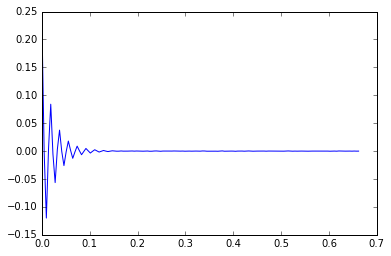

In [54]:
#not worried about converting the x axis to proper units.

timeD = np.fft.irfft(y_line)
t = np.fft.fftfreq(len(timeD),np.abs(x_line[1]-x_line[0]))
plt.plot(t[0:len(t)//2],timeD[0:len(t)//2])
plt.show()